# XGBoost Classification Red Wine

In [1]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("./Resources/Data/winequality-red-clean-xgboost.csv", delimiter=',')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1351,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1352,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1353,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
X = df.drop(['quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)


(1355, 11) (1355,)


# Create a Train Test Split

In [4]:
# Split the data using train_test_split

X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((948, 11), (272, 11), (135, 11), (948,), (272,), (135,))

In [5]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [6]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [7]:
# Init classifier
xgb_cl = xgb.XGBClassifier(use_label_encoder=False, objective="binary:logistic")

print(xgb_cl)
# Fit
xgb_cl.fit(X_train, y_train)


print(f'Train Data Score: {xgb_cl.score(X_train,y_train)}')
print(f'Validation Data Score: {xgb_cl.score(X_val,y_val)}')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None)
[01:08:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [8]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.5,0.7,0.9],
    "colsample_bytree": [0.5, 0.7, 0.9],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False)

# Init Grid Search
grid = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, verbose=3, cv=3, scoring="roc_auc",return_train_score=True)


In [9]:
# Train the model with GridSearch
grid.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[01:08:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, us

In [10]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
0.8646408263798825


In [11]:
#Choose the best parameter and run a final test from one of those:
#1 - Previous tuning or
#2 - GridSearch
#best_xgb_cl = xgb_cl 
#or
best_xgb_cl = grid.best_estimator_ #Chose this because GridSearch got a 0.864 score
print(best_xgb_cl)
best_xgb_cl.fit(X_train, y_train)
X_train_c = np.concatenate([X_train, X_val])
y_train_c = np.concatenate([y_train, y_val])
best_xgb_cl.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_xgb_cl.score(X_train_c,y_train_c)}')
print(f'Validation Data: {best_xgb_cl.score(X_val,y_val)}')
print(f'Final result Test Data: {best_xgb_cl.score(X_test,y_test)}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[01:08:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:54] WARNING: /o

In [12]:
predictions = best_xgb_cl.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [13]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.94      0.98      0.96       121
   Very Good       0.78      0.50      0.61        14

    accuracy                           0.93       135
   macro avg       0.86      0.74      0.79       135
weighted avg       0.93      0.93      0.93       135



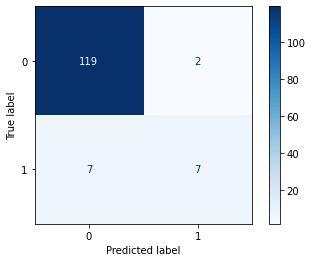

In [14]:
plot_confusion_matrix(best_xgb_cl, X_test, y_test, cmap=plt.cm.Blues)  
plt.savefig('Resources/images/XGBoost_Red_Confusion_Matrix.png')
plt.show()

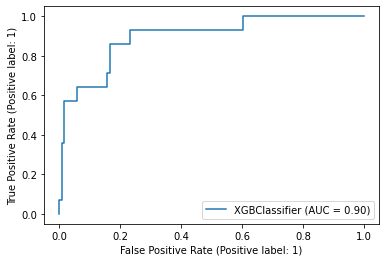

In [15]:
rf_disp = plot_roc_curve(best_xgb_cl, X_test, y_test)
plt.savefig('Resources/images/XGBoost_Red_AUC_Graph.png')
plt.show()

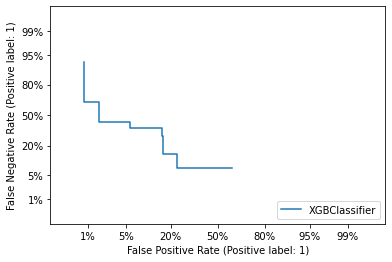

In [16]:
rf_disp = metrics.plot_det_curve(best_xgb_cl, X_test, y_test)  
plt.savefig('Resources/images/XGBoost_Red_Graph.png')
plt.show() 

In [17]:
best_xgb_cl.feature_importances_

array([0.09207312, 0.11154465, 0.07924604, 0.06413779, 0.07273655,
       0.08035858, 0.07658435, 0.08041254, 0.0545985 , 0.10550184,
       0.18280599], dtype=float32)

In [18]:
feature_names = X.columns
print(feature_names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [19]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_xgb_cl, X_test, y_test)

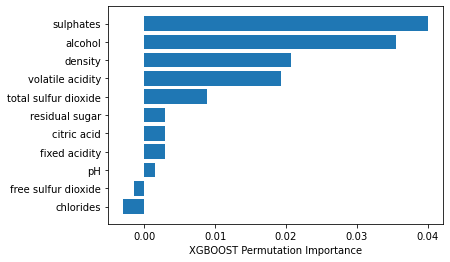

In [20]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("XGBOOST Permutation Importance")
plt.savefig('Resources/images/XGBoost_Red_Feature_Importance.png')

In [21]:
# Drop less import features
X = df.drop(['chlorides', 'free sulfur dioxide','pH', 'quality'], axis = 1)
y = df['quality']
print(X.shape, y.shape)

(1355, 8) (1355,)


In [22]:
# Split the data using train_test_split

X_train, X_, y_train, y_ = train_test_split(X,y,train_size=.7,random_state=3)
X_val,X_test, y_val, y_test = train_test_split(X_,y_,test_size=.33,random_state=3)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((948, 8), (272, 8), (135, 8), (948,), (272,), (135,))

In [23]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [25]:
best_xgb_cl = grid.best_estimator_
print(best_xgb_cl)
best_xgb_cl.fit(X_train, y_train)
X_train_c = np.concatenate([X_train, X_val])
y_train_c = np.concatenate([y_train, y_val])
best_xgb_cl.fit(X_train_c, y_train_c)
print(f'Train and Validation Data Concat: {best_xgb_cl.score(X_train_c,y_train_c)}')
print(f'Validation Data: {best_xgb_cl.score(X_val,y_val)}')
print(f'Final result Test Data: {best_xgb_cl.score(X_test,y_test)}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[01:08:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:08:54] WARNING: /o

In [26]:
predictions = best_xgb_cl.predict(X_test)
actual = y_test.tolist()

pred_act=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)


In [27]:
# Calculate classification report
y_names = ['Fair','Very Good']

print(classification_report(y_test, predictions,
                            target_names=y_names))

              precision    recall  f1-score   support

        Fair       0.94      0.99      0.97       121
   Very Good       0.88      0.50      0.64        14

    accuracy                           0.94       135
   macro avg       0.91      0.75      0.80       135
weighted avg       0.94      0.94      0.93       135



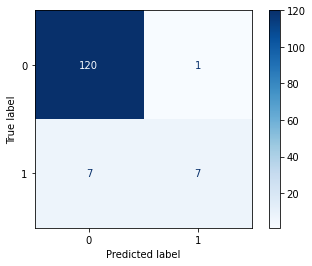

In [28]:
plot_confusion_matrix(best_xgb_cl, X_test, y_test, cmap=plt.cm.Blues)

plt.savefig('Resources/images/XGBoost_Red_Less_Features_Confusion_Matrix.png')
plt.show() 

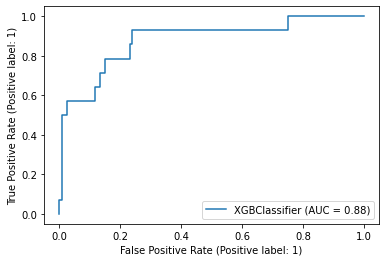

In [29]:
rf_disp = plot_roc_curve(best_xgb_cl, X_test, y_test)

plt.savefig('Resources/images/XGBoost_Red_Less_Features_AUC_Graph.png')
plt.show()

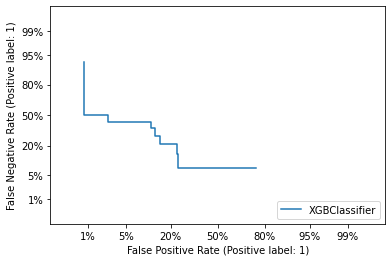

[01:08:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.5;, score=(train=0.917, test=0.888) total time=   0.7s
[01:08:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.5;, score=(train=0.933, test=0.887) total time=   0.8s
[01:08:2

[01:08:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.7;, score=(train=0.922, test=0.887) total time=   0.7s
[01:08:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.5;, score=(train=0.937, test=0.884) total time=   0.8s
[01:08:2

[01:08:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, subsample=0.9;, score=(train=0.924, test=0.887) total time=   0.7s
[01:08:26] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, subsample=0.7;, score=(train=0.969, test=0.812) total time=   0.8s
[01:08:2

In [30]:
rf_disp = metrics.plot_det_curve(best_xgb_cl, X_test, y_test)  
  
plt.savefig('Resources/images/XGBoost_Red_Less_Features_Graph.png')
plt.show() 